<a href="https://colab.research.google.com/github/aliyaaliyal/mesin-learning/blob/main/Pengembangan_MLP_Model_Menggunakan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Menyiapkan dataset

In [4]:
dataset = tfds.load("iris", split="train", as_supervised=True, shuffle_files=False)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/iris/2.0.0.incompleteAKZMLI/iris-train.tfrecord*...:   0%|          | 0/150 [0…

Dataset iris downloaded and prepared to ~/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


In [5]:
input_feature = []
labels = []

for data in tfds.as_numpy(dataset):
  X, Y = data[0], data[1]
  input_feature.append(X)
  labels.append(Y)

In [6]:
import numpy as np

input_feature = np.array(input_feature)
labels = np.array(labels)

In [7]:
input_feature.shape

(150, 4)

In [8]:
labels

array([0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0])

# Membuat Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu", input_shape=(input_feature.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


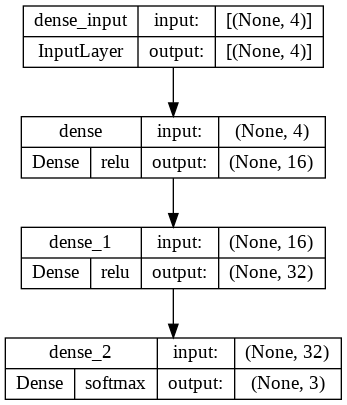

In [13]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_activations=True)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(input_feature, labels, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 1.3487 - accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 1.1859 - accuracy: 0.6667
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0543 - accuracy: 0.6667
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9567 - accuracy: 0.6667
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8731 - accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8107 - accuracy: 0.6667
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7744 - accuracy: 0.6667
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7442 - accuracy: 0.6800
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.7467
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.7800
Epoch 11/100
5/5 [===========

In [15]:
output = model.predict([[5.4, 3.9, 1.3, 0.4]])

1/1 [==============================] - 0s 103ms/step


In [16]:
output

array([[9.9811542e-01, 1.8846178e-03, 1.1059428e-08]], dtype=float32)

In [17]:
print(np.argmax(output[0]))

0
